In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
df.shape

(891, 12)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
#Age ad Cabin are two columns having null values

In [239]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [240]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [241]:
total = df.isna().sum().sort_values(ascending=False)

In [242]:
percent1 = (df.isna().sum().sort_values(ascending=False)/df.isna().count())*100
percent1
percent2 = round(percent1,1).sort_values(ascending=False)
percent2

Cabin          77.1
Age            19.9
Embarked        0.2
Ticket          0.0
Survived        0.0
SibSp           0.0
Sex             0.0
Pclass          0.0
PassengerId     0.0
Parch           0.0
Name            0.0
Fare            0.0
dtype: float64

In [243]:
missing_data = pd.concat([total,percent2],axis=1,keys=['Total','%'])
missing_data.sort_values('%',ascending=False).head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Name,0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


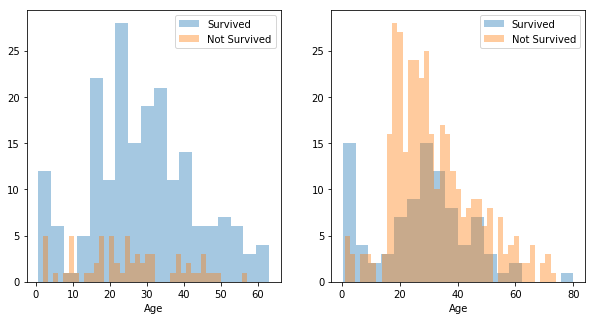

In [244]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
women= df[df['Sex']=='female']
men= df[df['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), label='Survived', bins=18, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), label='Not Survived', bins=40, ax=axes[0], kde=False)

ax.legend()

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), label='Survived', bins=18, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), label='Not Survived', bins=40, ax=axes[1], kde=False)

ax.legend()

In [245]:
women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


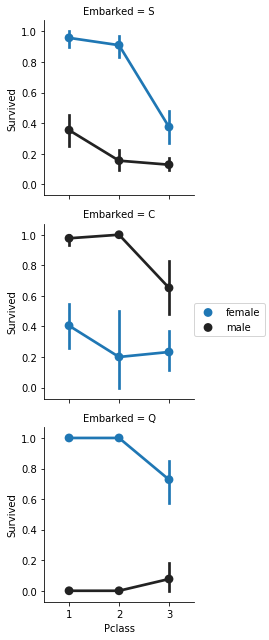

In [246]:
facetgrid = sns.FacetGrid(df, row='Embarked')
facetgrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
facetgrid.add_legend()

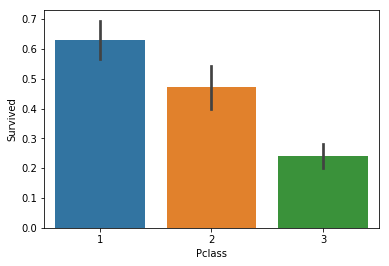

In [247]:
sns.barplot(x='Pclass',y='Survived', data=df)

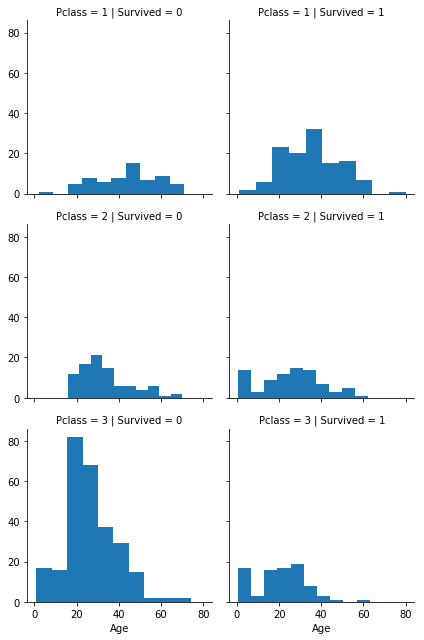

In [248]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age')

In [249]:
df['relatives'] = df['Parch'] + df['SibSp']
#data.loc[data['relatives'] > 0, 'not_alone'] = 0
#data.loc[data['relatives'] ==0, 'not_alone'] = 1
#data['not_alone'] = data['not_alone'].astype(int)
#df['not_alone'].value_counts()

In [250]:
df['relatives'].count()

891

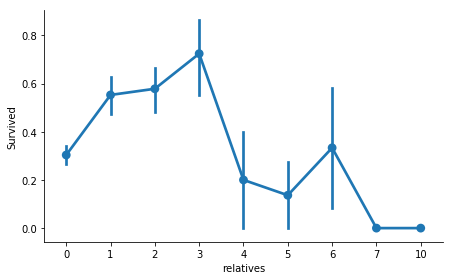

In [251]:
axes = sns.factorplot('relatives', 'Survived', data=df, aspect=1.6)

In [252]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [253]:
df = df.drop(labels='PassengerId', axis=1)

In [254]:
deck = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}

In [255]:
import re

In [256]:
for data in df:
    df['Cabin']= df['Cabin'].fillna('U0')
    df['Deck']= df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df['Deck'] = df['Deck'].map(deck)
    df['Deck'] = df['Deck'].fillna(0)
    df['Deck'] = df['Deck'].astype(int)

In [257]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,8


In [258]:
df = df.drop(labels=['Cabin'], axis=1)

In [259]:
import numpy as np
from numpy import random

In [260]:
for data in df:
    mean = df['Age'].mean()
    std = df['Age'].std()
    is_null = df['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    age_slice = df['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df['Age'] = age_slice
    df['Age'] = df['Age'].astype(int)

df['Age'].isnull().sum()

0

In [261]:
df['Embarked'] = df['Embarked'].fillna('S')

In [262]:
df['Embarked'].isnull().sum()

0

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
Deck         891 non-null int32
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.6+ KB


In [264]:
df['Fare'] = df['Fare'].astype(int)

In [265]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,8


In [266]:
title = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

In [267]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object

In [268]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [269]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Mme', 'Ms', 'Mlle'],
      dtype=object)

In [270]:
df['Title'].replace(to_replace='Mme', value='Mrs', inplace=True)
df['Title'].replace(to_replace='Mlle', value='Miss', inplace=True)
df['Title'].replace(to_replace='Ms', value='Miss', inplace=True)

In [271]:
df['Title'] = df['Title'].map(title)

In [272]:
df = df.drop(labels=['Name'], axis=1)

In [273]:
Sex_map = {'male':0,'female':1}
df['Sex'] = df['Sex'].map(Sex_map)

In [274]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,8,2
3,1,1,1,35,1,0,113803,53,S,1,3,3
4,0,3,0,35,0,0,373450,8,S,0,8,1


In [276]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [278]:
df= df.drop(labels=['Ticket'],axis=1)

In [279]:
ports = {'S':0,'C':1,'Q':2}

In [280]:
df['Embarked'] = df['Embarked'].map(ports)

In [281]:
df.loc[df['Age'] <=11, 'Age'] = 0

In [285]:
df['Age'] = df['Age'].astype(int)
df.loc[(df['Age'] > 11) & (df['Age'] <=18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <=22), 'Age'] = 2
df.loc[(df['Age'] > 22) & (df['Age'] <=27), 'Age'] = 3
df.loc[(df['Age'] > 27) & (df['Age'] <=33), 'Age'] = 4
df.loc[(df['Age'] > 33) & (df['Age'] <=40), 'Age'] = 5
df.loc[(df['Age'] > 40) & (df['Age'] <=66), 'Age'] = 6
df.loc[df['Age'] > 66, 'Age'] = 6

In [290]:
df.groupby('Age').count()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,Deck,Title
Age,,,,,,,,,,
0,68,68,68,68,68,68,68,68,68,68
1,99,99,99,99,99,99,99,99,99,99
2,118,118,118,118,118,118,118,118,118,118
3,135,135,135,135,135,135,135,135,135,135
4,164,164,164,164,164,164,164,164,164,164
5,139,139,139,139,139,139,139,139,139,139
6,168,168,168,168,168,168,168,168,168,168


In [291]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Deck,Title
0,0,3,0,2,1,0,7,0,1,8,1
1,1,1,1,5,1,0,71,1,1,3,3
2,1,3,1,3,0,0,7,0,0,8,2
3,1,1,1,5,1,0,53,0,1,3,3
4,0,3,0,5,0,0,8,0,0,8,1


In [292]:
df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <=14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <=31), 'Fare'] = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <=99), 'Fare'] = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <=250), 'Fare'] = 4
df.loc[df['Fare'] > 250, 'Fare'] = 5

df['Fare'] = df['Fare'].astype(int)

In [293]:
df['Fare'].unique()

array([0, 3, 1, 2, 5, 4], dtype=int64)

In [294]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Deck,Title
0,0,3,0,2,1,0,0,0,1,8,1
1,1,1,1,5,1,0,3,1,1,3,3
2,1,3,1,3,0,0,0,0,0,8,2
3,1,1,1,5,1,0,3,0,1,3,3
4,0,3,0,5,0,0,1,0,0,8,1


In [295]:
df['Age_class'] = df['Age']*df['Pclass']

In [298]:
df['Fare_per_person'] = df['Fare']/(df['relatives']+1)
df['Fare_per_person'] = df['Fare_per_person'].astype(int)

In [300]:
df['Fare_per_person'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [299]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Deck,Title,Age_class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,8,1,6,0
1,1,1,1,5,1,0,3,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,0,8,2,9,0
3,1,1,1,5,1,0,3,0,1,3,3,5,1
4,0,3,0,5,0,0,1,0,0,8,1,15,1


In [302]:
X = df.drop(labels=['Survived'], axis=1)
y = df['Survived']

In [303]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [306]:
print(X_train.shape)
print(X_test.shape)

(712, 12)
(179, 12)


##Decision Tree Classifier##

In [308]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [309]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [316]:
y_pred = dtree.predict(X_test)
dtree.score(X_train,y_train)

0.9311797752808989

In [315]:
y_test.shape

(179,)